### Read and examine a dataset and classify variables by their type: quantitative vs. categorical

In [2]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import the dataset
df=pd.read_csv('Dataset.csv',names=['Gender','Height','Weight','Index'])
df

,Gender,Height,Weight,Index
0,Male,1.875714,109.721205,4
1,Male,1.747060,73.622879,1
2,Male,1.882397,96.497744,2
3,Male,1.821967,99.809704,3
4,Male,1.774998,93.598806,3
...,...,...,...,...
9995,Female,1.680785,62.041283,1
9996,Female,1.703506,77.504471,4
9997,Female,1.622247,58.275494,2
9998,Female,1.753470,74.322315,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
 3   Index   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


#### We see that there are 4 attributes, 2 are float, one is integer and one is object.

### Handle categorical variables with numerically coded values

In [5]:
dummy=df
dummy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
dummy

,Gender,Height,Weight,Index
0,1,1.875714,109.721205,4
1,1,1.747060,73.622879,1
2,1,1.882397,96.497744,2
3,1,1.821967,99.809704,3
4,1,1.774998,93.598806,3
...,...,...,...,...
9995,0,1.680785,62.041283,1
9996,0,1.703506,77.504471,4
9997,0,1.622247,58.275494,2
9998,0,1.753470,74.322315,3


#### As the Gender data was an object because it had 2 values, 'Male' and 'Female', therefore it had to be changed into a numerical data for visulaization.
#### In the changed data, Male is taken to be '1' and female is taken to be '0'. 

### Perform univariate and bivariate analysis and derive meaningful insights about the dataset

### Univariate Analysis
#### This analysis means that the data is visualized with respect to only one attribute or variable.

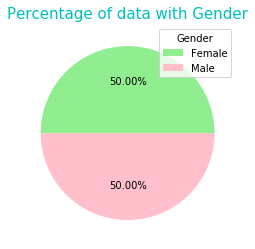

In [6]:
Gen=['Female','Male']
color=['lightgreen','pink']
plt.pie(dummy.groupby('Gender').count()['Weight'],colors=color,autopct='%1.2f%%')
plt.legend(Gen,title="Gender",loc='upper right')
plt.title('Percentage of data with Gender',color='c',size=15)
plt.show()

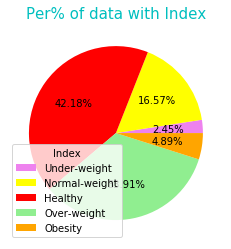

In [7]:
Index=['Under-weight', 'Normal-weight', 'Healthy', 'Over-weight', 'Obesity']
color=['violet','yellow','red','lightgreen','orange']
plt.pie(dummy.groupby('Index').count()['Weight'],colors=color,autopct='%1.2f%%')
plt.legend(Index,title="Index",loc='lower left')
plt.title('Per% of data with Index',color='c',size=15)
plt.show()

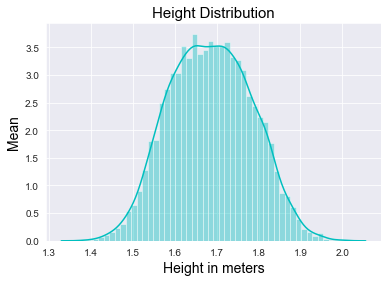

In [8]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Height'],color='c')
plt.title('Height Distribution',color='black',size=15)
plt.xlabel('Height in meters',color='black',size=14)
plt.ylabel('Mean',color='black',size=14)
plt.show()

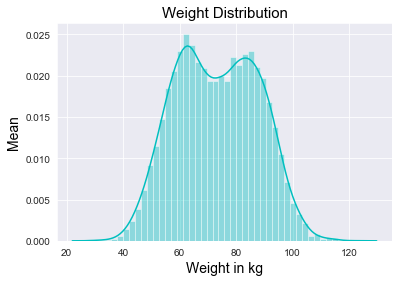

In [9]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Weight'],color='c')
plt.title('Weight Distribution',color='black',size=15)
plt.xlabel('Weight in kg',color='black',size=14)
plt.ylabel('Mean',color='black',size=14)
plt.show()

### Bivariate Analysis 
#### This analysis includes the visualisation between 2 attributes or variables.

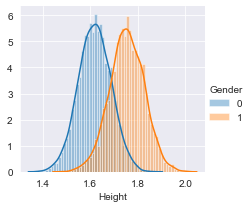

In [10]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Height").add_legend()
plt.show()

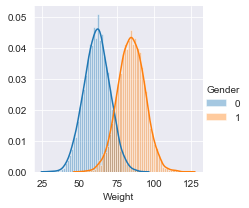

In [11]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Weight").add_legend()
plt.show()

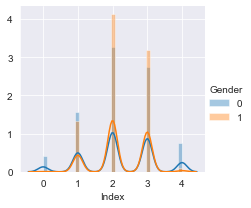

In [12]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Index").add_legend()
plt.show()

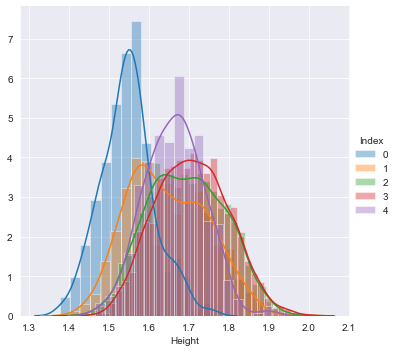

In [13]:
sns.FacetGrid(dummy,hue="Index",height=5).map(sns.distplot,"Height").add_legend()
plt.show()

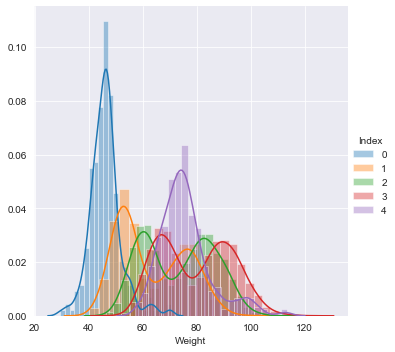

In [14]:
sns.FacetGrid(dummy,hue="Index",height=5).map(sns.distplot,"Weight").add_legend()
plt.show()

### Identify and treat missing values and check dataset outliers

In [15]:
dummy.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

#### We see that there is no null or NaN values in our dataset.

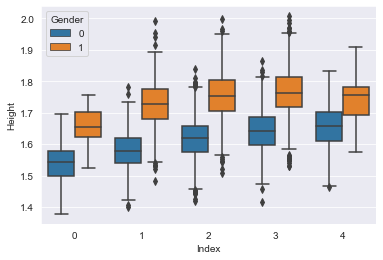

In [16]:
sns.boxplot(x='Index',y='Height',hue='Gender',data=dummy)
plt.show()

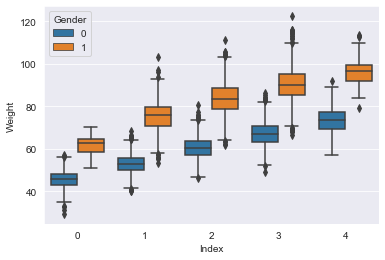

In [17]:
sns.boxplot(x='Index',y='Weight',hue='Gender',data=dummy)
plt.show()

#### The boxplot shows us the variability of our data. In case of our data, some people can have very high or very low weight, therefore there will be data which will be far away from mean.

### Build a correlation matrix to identify relevant variables ( Graph )

In [18]:
# correlation matrix
corrMatrix=dummy.corr()
corrMatrix

,Gender,Height,Weight,Index
Gender,1.000000,0.691072,0.796723,0.008550
Height,0.691072,1.000000,0.924756,0.220223
Weight,0.796723,0.924756,1.000000,0.428293
Index,0.008550,0.220223,0.428293,1.000000


#### A correlation matrix tells how 2 variables are strongly related to each other.

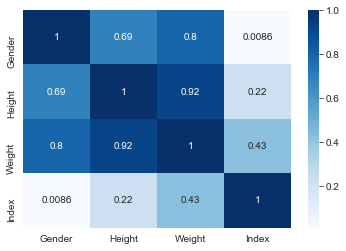

In [24]:
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()